## Swarm data - Thermosphere Neutral Density

#### Following are the external libraries used in the project

In [2]:
import os
os.environ["CDF_LIB"] = "C:/Users/jose_ne/Downloads/cdf3.8.0_64bit_VS2015/lib"
from spacepy import pycdf
import pandas as pd

In [15]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ------------ -------------------------- 81.9/250.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install cdflib matplotlib basemap


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib cartopy


Note: you may need to restart the kernel to use updated packages.


In [21]:
conda install -c conda-forge cartopy


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0




##### Check what parameters and meta data are provided in the data set. Are there any quality flags?

In [16]:
#open the CDF file
cdf_file = pycdf.CDF(r'C:\Users\jose_ne\Downloads\THERMOSPHERE\SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')

#Create an empty dataframe
df = pd.DataFrame()

#Load variables and their values into the DataFrame
for var_name in cdf_file:
    cdf_var = cdf_file[var_name]
    df[var_name] = cdf_var[:]
    

#List global attributes (metadata)
global_attributes = {attr_name: [cdf_file.attrs[attr_name]] for attr_name in cdf_file.attrs}
global_df = pd.DataFrame(global_attributes)

#Check for quality flags
quality_flags = {}
for var_name in cdf_file:
    cdf_var = cdf_file[var_name]
    for var_attr_name in cdf_var.attrs:
        if 'flag' in var_attr_name.lower():
            if var_name not in quality_flags:
                quality_flags[var_name] = {}
            quality_flags[var_name][var_attr_name] = [cdf_var.attrs[var_attr_name]]
            
            
#Create a DataFrame for quality flags
flag_dfs = {var_name: pd.DataFrame(flags) for var_name, flags in quality_flags.items()}

#Display DataFrames
print("Variables and Values:")
print(df)
df.to_excel('Swarmdata2.xlsx', index=True)

print("\nGlobal Attributes (Metadata):")
print(global_df)

if flag_dfs:
    print("\nQuality Flags:")
    for var_name, flag_df in flag_dfs.items():
        print(f"Variable: {var_name}")
        print(flag_df)
        
        
#Close the CDF file
cdf_file.close()

Variables and Values:
                    time       density       altitude   latitude  longitude  \
0    2014-02-01 00:00:00  5.184454e-13  494739.849495  -6.712439 -54.571835   
1    2014-02-01 00:00:10  5.173494e-13  494892.962741  -7.350848 -54.586020   
2    2014-02-01 00:00:20  5.178510e-13  495050.712763  -7.989212 -54.600126   
3    2014-02-01 00:00:30  5.099569e-13  495213.057146  -8.627530 -54.614148   
4    2014-02-01 00:00:40  5.106715e-13  495379.955465  -9.265799 -54.628078   
...                  ...           ...            ...        ...        ...   
8635 2014-02-01 23:59:10  4.885602e-13  524038.760554 -85.329056 -24.516611   
8636 2014-02-01 23:59:20  4.819704e-13  524110.934032 -85.852045 -20.006840   
8637 2014-02-01 23:59:30  4.785112e-13  524177.630182 -86.341594 -14.236125   
8638 2014-02-01 23:59:40  4.822021e-13  524238.832750 -86.782416  -6.778956   
8639 2014-02-01 23:59:50  4.767876e-13  524294.528001 -87.151808   2.826676   

      local_solar_time  
0   

##### Generate a global map and plot the latitude-longitude locations of the observed data points.

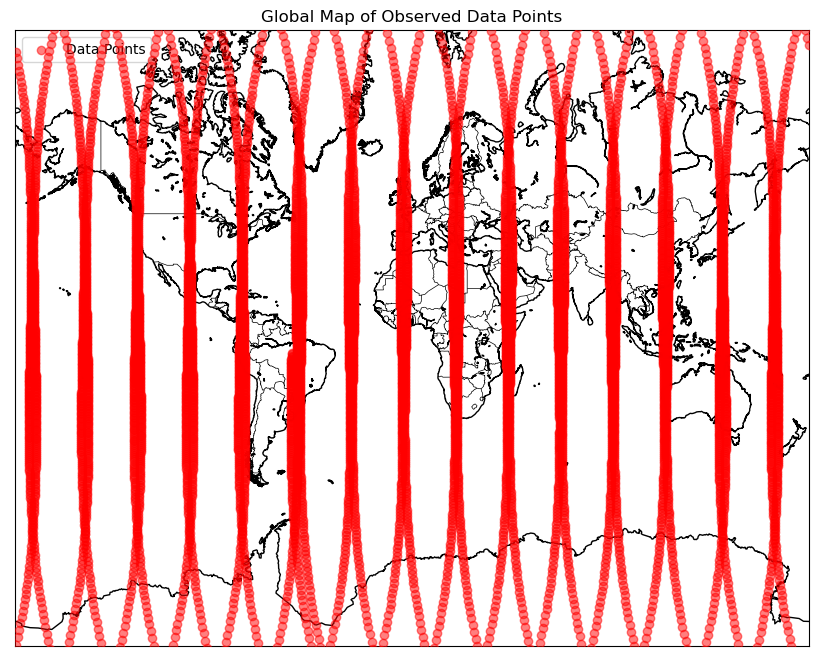

In [63]:
import cdflib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Extract latitude and longitude data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')

# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Plot the data points
x, y = m(longitude, latitude)
m.scatter(x, y, marker='o', color='red',alpha=0.5, zorder=10, label='Data Points')

# Customize the plot (title, legend, etc.)
plt.title('Global Map of Observed Data Points')
plt.legend(loc='best')
plt.show()






##### Add the orbit altitude as color information to the plot. Use a colorbar or color limits from 480– 500 km

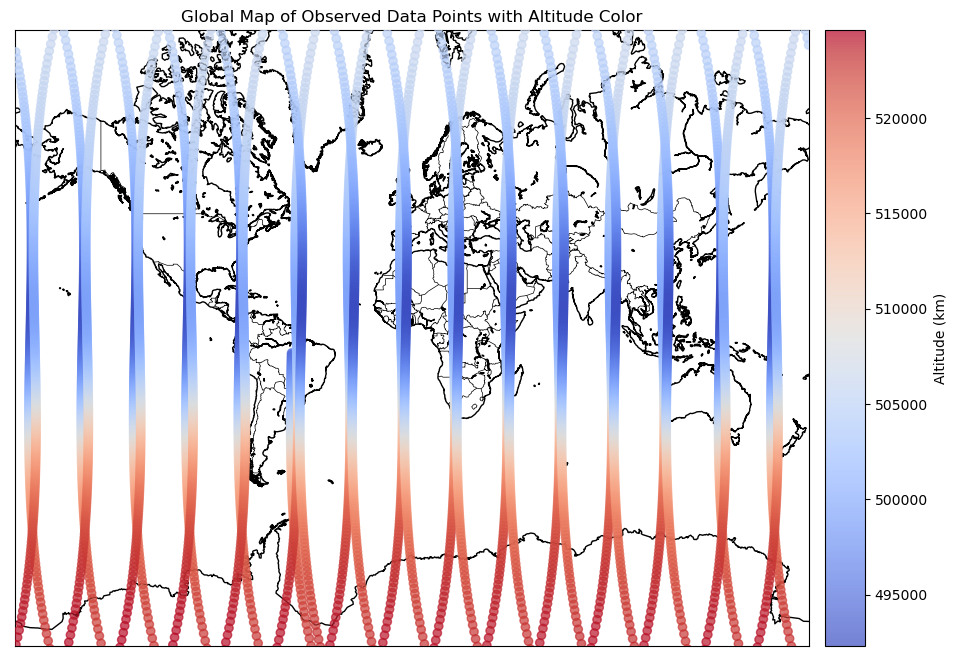

In [60]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)


# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and altitude data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')
altitude = cdf.varget('altitude')  

# Define color limits for altitude
altitude_min = 480000  # Minimum altitude in km
altitude_max = 520000  # Maximum altitude in km


# Create a colormap (you can change this to any other colormap)
cmap = plt.get_cmap('coolwarm')

# Plot the data points with altitude as color
x, y = m(longitude, latitude)
sc = m.scatter(x, y, c=altitude, cmap=cmap, alpha=0.7, marker='o', zorder=10)


# Add a colorbar to the plot
cbar = m.colorbar(sc, location='right', label='Altitude (km)')

# Customize the plot (title, legend, etc.)
plt.title('Global Map of Observed Data Points with Altitude Color')
plt.show()



##### Generate a global map and plot the local solar time as color information to the observation location

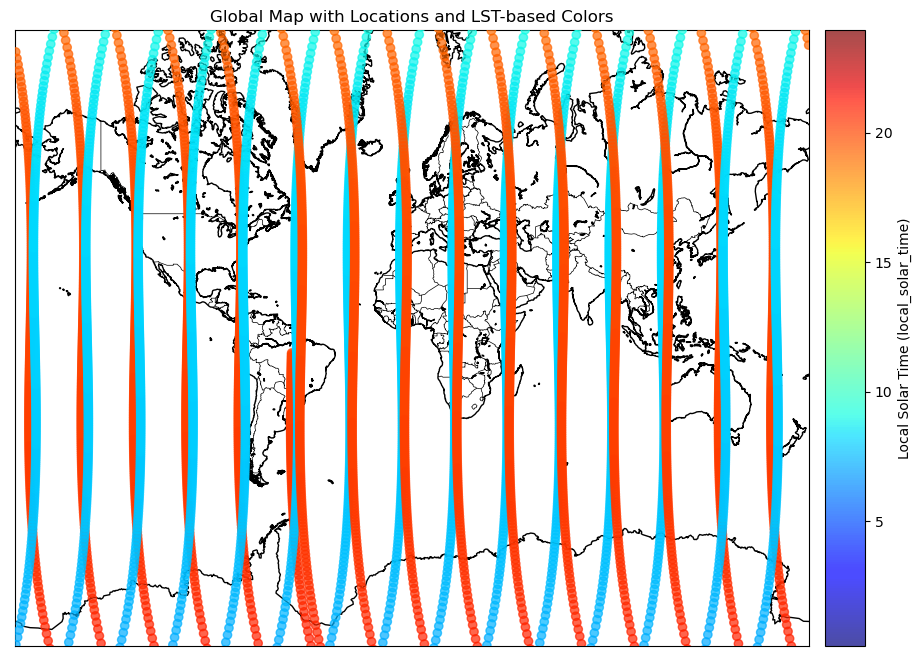

In [59]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)


# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and local solar time data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')
local_solar_time = cdf.varget('local_solar_time')  

# Create a colormap (you can change this to any other colormap)
cmap = plt.get_cmap('jet')

# Plot the data points with local solar time as color
x, y = m(longitude, latitude)
sc = m.scatter(x, y, c=local_solar_time, cmap=cmap, alpha=0.7, marker='o', zorder=10)


# Add a colorbar to the plot
cbar = m.colorbar(sc, location='right', label='Local Solar Time (local_solar_time)')

# Add a title and display the map
plt.title('Global Map with Locations and LST-based Colors')
plt.show()


##### Separate data for the two different LST zones

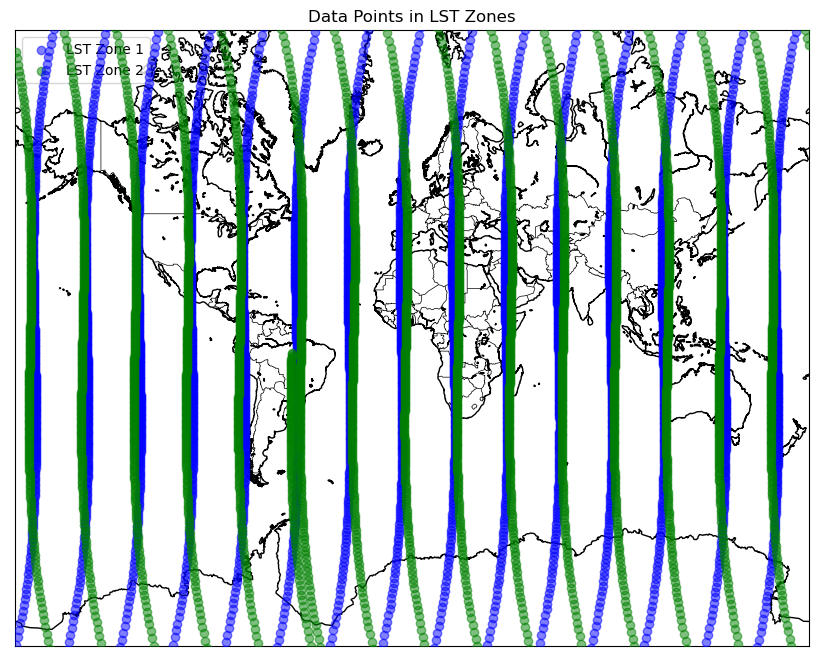

In [12]:
from mpl_toolkits.basemap import Basemap

# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and LST data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude') 
lst_data = cdf.varget('local_solar_time')  

# Define the LST boundaries for two zones
lst_zone1_start = 0.0  #  start time for the first zone (e.g., 0.0 for midnight)
lst_zone1_end = 12.0  # end time for the first zone (e.g., 12.0 for noon)

lst_zone2_start = 12.0  #  start time for the second zone (e.g., noon)
lst_zone2_end = 24.0  # end time for the second zone (e.g., 24.0 for midnight)

# Create masks for the two LST zones
mask_zone1 = (lst_data >= lst_zone1_start) & (lst_data < lst_zone1_end)
mask_zone2 = (lst_data >= lst_zone2_start) & (lst_data < lst_zone2_end)

# Plot the data points for LST Zone 1
x_zone1, y_zone1 = m(longitude[mask_zone1], latitude[mask_zone1])
m.scatter(x_zone1, y_zone1, c='blue', marker='o', alpha=0.5, label='LST Zone 1', zorder=10)

# Plot the data points for LST Zone 2
x_zone2, y_zone2 = m(longitude[mask_zone2], latitude[mask_zone2])
m.scatter(x_zone2, y_zone2, c='green', marker='o', alpha=0.5, label='LST Zone 2', zorder=10)

# Customize the plot (title, legend, etc.)
plt.title('Data Points in LST Zones')
plt.legend(loc='best')
plt.show()




##### Plot densities into a global map for the two LSTs separately

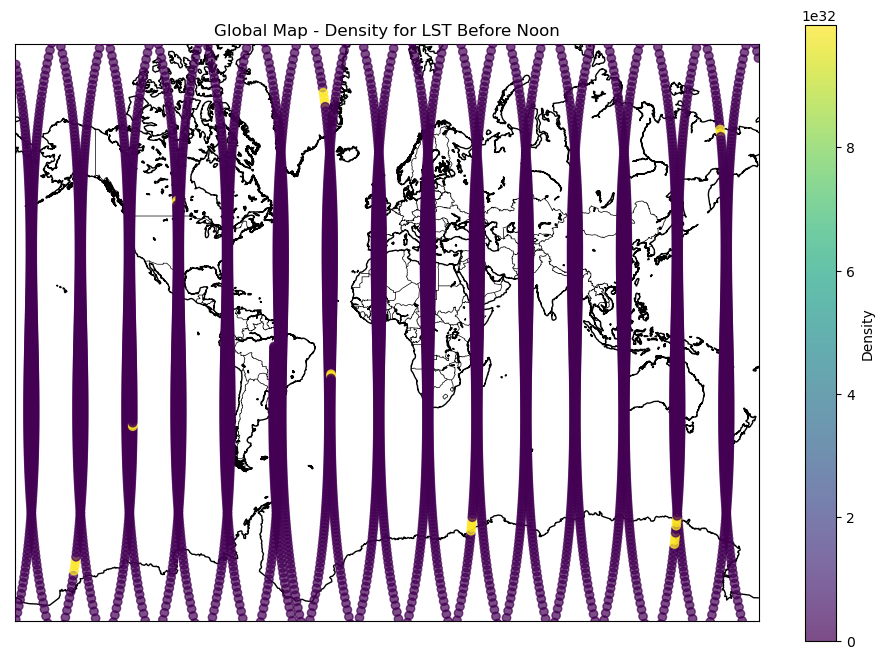

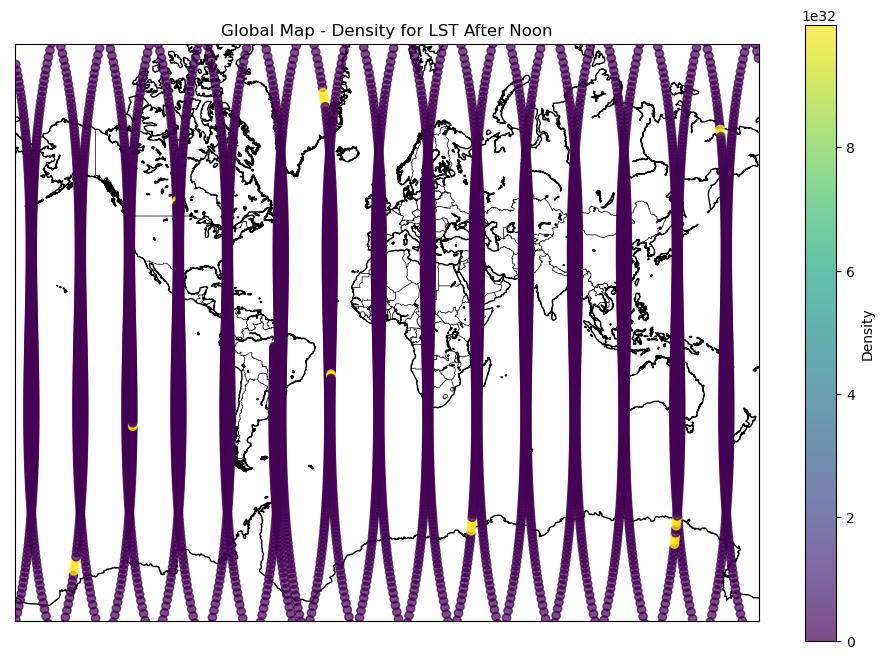

In [14]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Extract latitude, longitude, and LST data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude') 
lst_data = cdf.varget('local_solar_time') 
density = cdf.varget('density')

# Define the LST boundaries for two zones
lst_zone1_start = 0.0  #  start time for the first zone (e.g., 0.0 for midnight)
lst_zone1_end = 12.0  # end time for the first zone (e.g., 12.0 for noon)

lst_zone2_start = 12.0  #  start time for the second zone (e.g., noon)
lst_zone2_end = 24.0  # end time for the second zone (e.g., 24.0 for midnight)
    
# Create masks for the two LST zones
mask_zone1 = (lst_data >= lst_zone1_start) & (lst_data < lst_zone1_end)
mask_zone2 = (lst_data >= lst_zone2_start) & (lst_data < lst_zone2_end)

# Create a function to plot data on a global map
def plot_global_map(data, title):
    
    # Create a figure and axis for the map
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    
    # Create a Basemap object for plotting
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
    m.drawcoastlines()
    m.drawcountries()
    
    
    
    # Create a colormap (you can change this to any other colormap)
    cmap = plt.get_cmap('viridis')
    
    # Plot the data points with density as color
    x, y = m(longitude, latitude)
    sc = m.scatter(x, y, c=density, cmap=cmap, alpha=0.7, marker='o', zorder=10)
    
    
    
    
    # Add a colorbar for density values
    cbar = plt.colorbar(sc, ax=ax, label='Density')
    

    # Add a title
    plt.title(title)
    plt.show()
    
# Plot the global map for LST before noon
plot_global_map(mask_zone1, 'Global Map - Density for LST Before Noon')

# Plot the global map for LST after noon
plot_global_map(mask_zone2, 'Global Map - Density for LST After Noon')


##### Find the outlier from dataset using density and time columns

IndexError: arrays used as indices must be of integer (or boolean) type

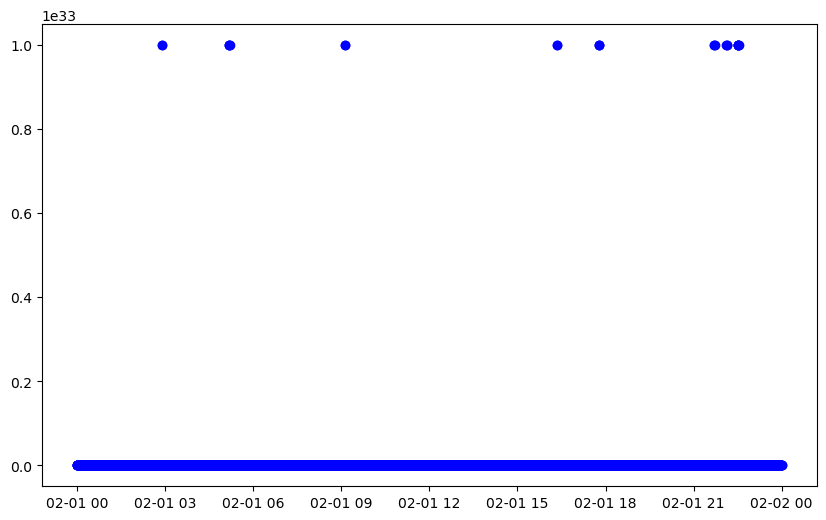

In [13]:
import spacepy.pycdf as cdf
import numpy as np
import matplotlib.pyplot as plt

# Load Swarm CDF file
data = cdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file

# Access density and time-related data and convert them to NumPy arrays
density_values = np.array(data['density'])  # Replace 'Density' with the actual variable name in your file
timestamps = np.array(data['time'])  # Replace 'Timestamp' with the actual variable name in your file

# Identify outliers (example using z-score)
threshold = 2
outliers = density_values[abs((density_values - np.mean(density_values)) / np.std(density_values)) > threshold]

# Plot outliers in density over time
plt.figure(figsize=(10, 6))

plt.scatter(timestamps, density_values, color='blue', label='Density')
plt.scatter(timestamps[outliers], density_values[outliers], color='red', label='Outliers', s=50, alpha=0.5)

plt.xlabel('time')
plt.ylabel('density')
plt.title('Outliers in Density over Time')
plt.legend()
plt.show()


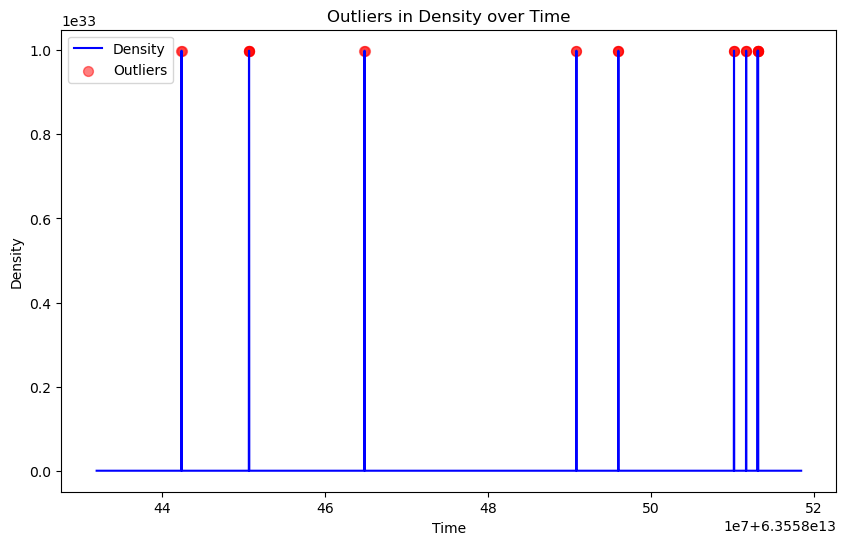

In [3]:
import cdflib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Swarm CDF file
data = cdflib.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file

# Access time and density data and convert them to NumPy arrays
timestamps = np.array(data['time'])  # Replace 'Time_column' with the actual variable name in your file
density_values = np.array(data['density'])  # Replace 'Density_column' with the actual variable name in your file

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, density_values, color='blue', label='Density')

# Calculate outliers using z-score method
threshold = 2
outliers = np.abs((density_values - np.mean(density_values)) / np.std(density_values)) > threshold

# Plot outliers
plt.scatter(timestamps[outliers], density_values[outliers], color='red', label='Outliers', s=50, alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Outliers in Density over Time')
plt.legend()
plt.show()


In [6]:
pip install aacgmv2

  Using cached aacgmv2-2.6.3.tar.gz (1.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build aacgmv2
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [303 lines of output]
  C:\Users\jose_ne\AppData\Local\Temp\pip-build-env-r8n7820n\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:80: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
    corresp(dist, value, root_dir)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\deprecated.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\utils.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\wrapper.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\__init__.py -> build\lib.win-amd64-cpython-310\aacgmv2
  copying aacgmv2\__main__.py -> build\lib.win-amd64-cpython-310\aacgmv2
  running egg_info
  writing aacgmv2.egg-info\PKG-INFO
  writing dependency_links to aacgmv2.egg-info\dependency_links.txt
  writing 

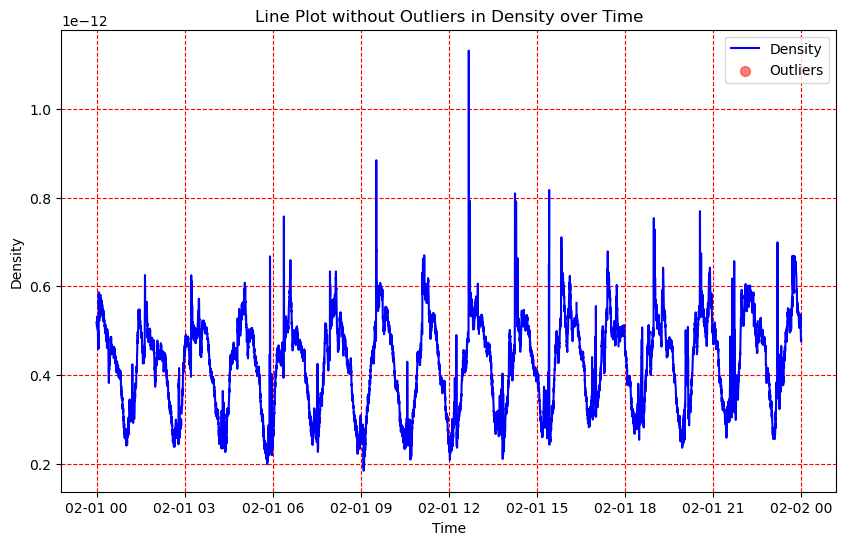

In [9]:
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import cdflib


# Load Swarm CDF file
data = cdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file


# Access time and density data and convert them to NumPy arrays
timestamps = np.array(data['time'])  # Replace 'Time_column' with the actual variable name in your file
density_values = np.array(data['density'])  # Replace 'Density_column' with the actual variable name in your file

# Calculate z-scores to identify outliers
z_scores = (density_values - np.mean(density_values)) / np.std(density_values)

# Set a threshold for z-scores to identify outliers
threshold = 2
outliers = np.abs(z_scores) > threshold

# Fill outlier points with NaN
density_values[outliers] = np.nan

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, density_values, color='blue', label='Density')


# Mark outliers on the plot
plt.scatter(timestamps[outliers], density_values[outliers], color='red', label='Outliers', s=50, alpha=0.5)

# Specify grid with line attributes
plt.grid(color='r', linestyle='--')



plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Line Plot without Outliers in Density over Time')

plt.legend()
plt.show()


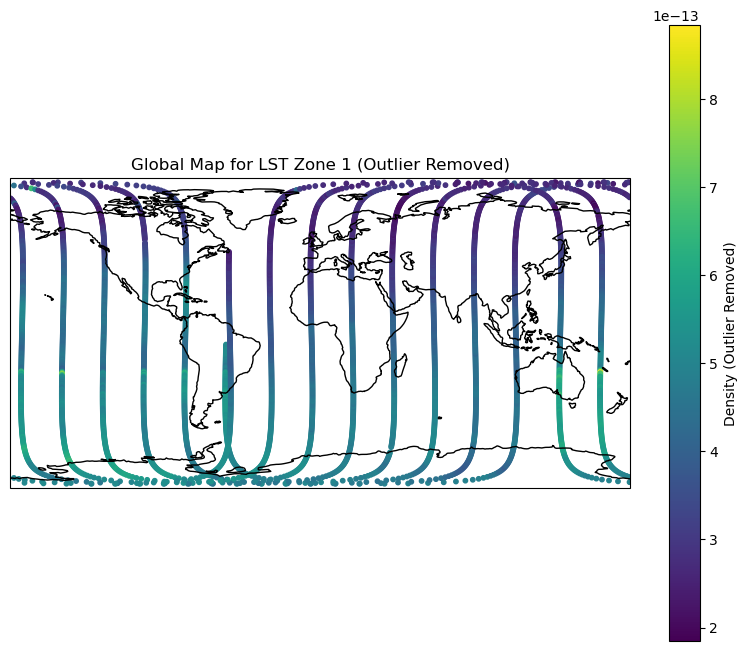

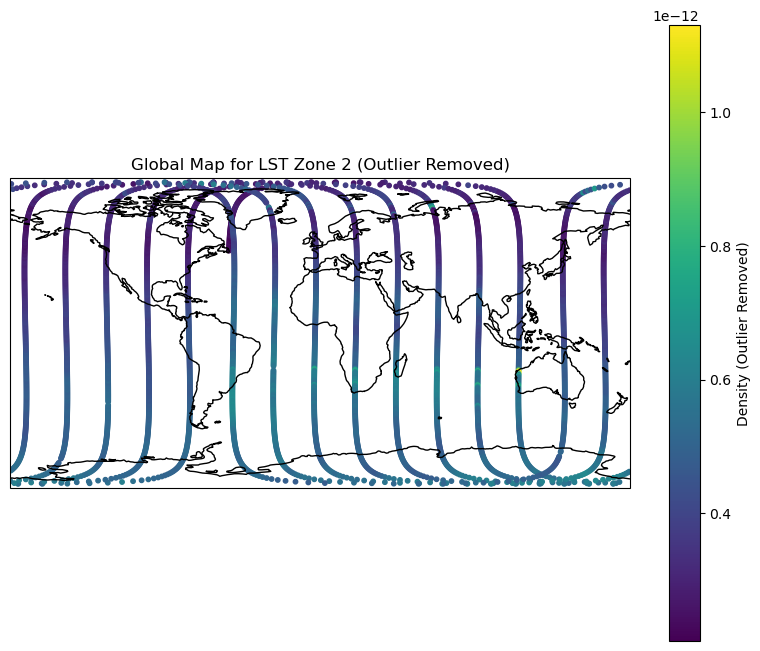

In [12]:
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from datetime import datetime


# Load Swarm CDF file
data = cdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file

# Access necessary data (e.g., latitude, longitude, density, and time)
latitude = np.array(data['latitude'])  # Replace with actual variable name
longitude = np.array(data['longitude'])  # Replace with actual variable name
density = np.array(data['density'])  # Replace with actual variable name
time = np.array(data['time'])  # Replace with actual variable name

# Convert datetime objects to hours for comparison
hours = np.array([t.hour for t in time])

# Divide time into two Local Solar Time (LST) zones
# Assuming LST values are in the range [0, 24)
lst_zone1_mask = (hours >= 0) & (hours < 12)
lst_zone2_mask = (hours >= 12) & (hours < 24)

# Identify and remove outliers in density
def remove_outliers(data, threshold=2):
    z_scores = (data - np.nanmean(data)) / np.nanstd(data)
    outliers = np.abs(z_scores) > threshold
    data[outliers] = np.nan
    return data

density_no_outliers1 = remove_outliers(density[lst_zone1_mask])
density_no_outliers2 = remove_outliers(density[lst_zone2_mask])

# Plot global map for LST Zone 1 with outlier-removed density
plt.figure(figsize=(10, 8))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
sc1 = ax1.scatter(longitude[lst_zone1_mask], latitude[lst_zone1_mask], c=density_no_outliers1, cmap='viridis', s=10, transform=ccrs.PlateCarree())
plt.colorbar(sc1, label='Density (Outlier Removed)')
plt.title('Global Map for LST Zone 1 (Outlier Removed)')
plt.show()

# Plot global map for LST Zone 2 with outlier-removed density
plt.figure(figsize=(10, 8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines()
sc2 = ax2.scatter(longitude[lst_zone2_mask], latitude[lst_zone2_mask], c=density_no_outliers2, cmap='viridis', s=10, transform=ccrs.PlateCarree())
plt.colorbar(sc2, label='Density (Outlier Removed)')
plt.title('Global Map for LST Zone 2 (Outlier Removed)')
plt.show()


In [13]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [19]:
import requests
import os
from datetime import datetime, timedelta

def download_swarm_data_for_year(year, product='DNSx_ACC', level='2', output_dir='swarm_data'):
    # Specify Swarm API URL
    swarm_api_url = 'https://swarm-diss.eo.esa.int/#swarm%2FLevel2daily%2FLatest_baselines%2FDNS%2FACC%2FSat_C'

    # Iterate over each day of the specified year
    start_date = datetime(2014, 1, 1)
    end_date = datetime(2014, 12, 31)

    current_date = start_date
    while current_date <= end_date:
        current_date_str = current_date.strftime('%Y%m%d')

        # Specify URL for the data file
        data_url = f'{swarm_api_url}/{product}/{level}/{current_date_str}'

        # Download the data file
        response = requests.get(data_url, stream=True)
        if response.status_code == 200:
            # Create output directory if it doesn't exist
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            # Save the data file
            output_file = os.path.join(output_dir, f'SW_{product}_{level}_{current_date_str}.CDF')
            with open(output_file, 'wb') as file:
                for chunk in response.iter_content(chunk_size=1024):
                    file.write(chunk)

            print(f'Downloaded: {output_file}')
        else:
            print(f'Failed to download data for {current_date_str}. Status Code: {response.status_code}')

        # Move to the next day
        current_date += timedelta(days=1)

# Example usage: Download Swarm data for the year 2023
download_swarm_data_for_year(2014, output_dir='path/directory')


Downloaded: path/directory\SW_DNSx_ACC_2_20140101.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140102.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140103.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140104.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140105.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140106.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140107.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140108.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140109.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140110.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140111.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140112.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140113.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140114.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140115.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140116.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140117.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140118.CDF
Downloaded: path/directory\S